## Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Delete
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading and preparing data

### Algorithm 1: CMAES

In [42]:
from optimization_cmaes import ENEMIES
from optimization_cmaes import DATA_FOLDER, NGEN, POPULATION_SIZE

N_RUNS = 10 # TODO: Delete, this should be in optimization file
ENEMIES = [1] # TODO: Delete

cmaes_data = np.zeros((len(ENEMIES), N_RUNS, NGEN, POPULATION_SIZE))

for (i, enemy) in enumerate(ENEMIES):
    cmaes_data[i] = np.load(DATA_FOLDER + f"/{enemy}/all_fitnesses_static.npy")

In [43]:
cmaes_max = np.max(cmaes_data, axis=3)
print(cmaes_max.shape)

cmaes_mean = np.mean(cmaes_data, axis=3)
print(cmaes_mean.shape)

(1, 10, 50)
(1, 10, 50)


### Algorithm 2: NEAT

In [44]:
# from optimization_NEAT import DATA_FOLDER, NGEN, POPULATION_SIZE

# N_RUNS = 10 # TODO: Delete, this should be in optimization file
# ENEMIES = [1] # TODO: Delete

# neat_data = np.zeros((len(ENEMIES), N_RUNS, NGEN, POPULATION_SIZE))

# for (i, enemy) in enumerate(ENEMIES):
#     neat_data[i] = np.load(DATA_FOLDER + f"/{enemy}/all_fitnesses_static.npy")

## Part 1: Fitness over time

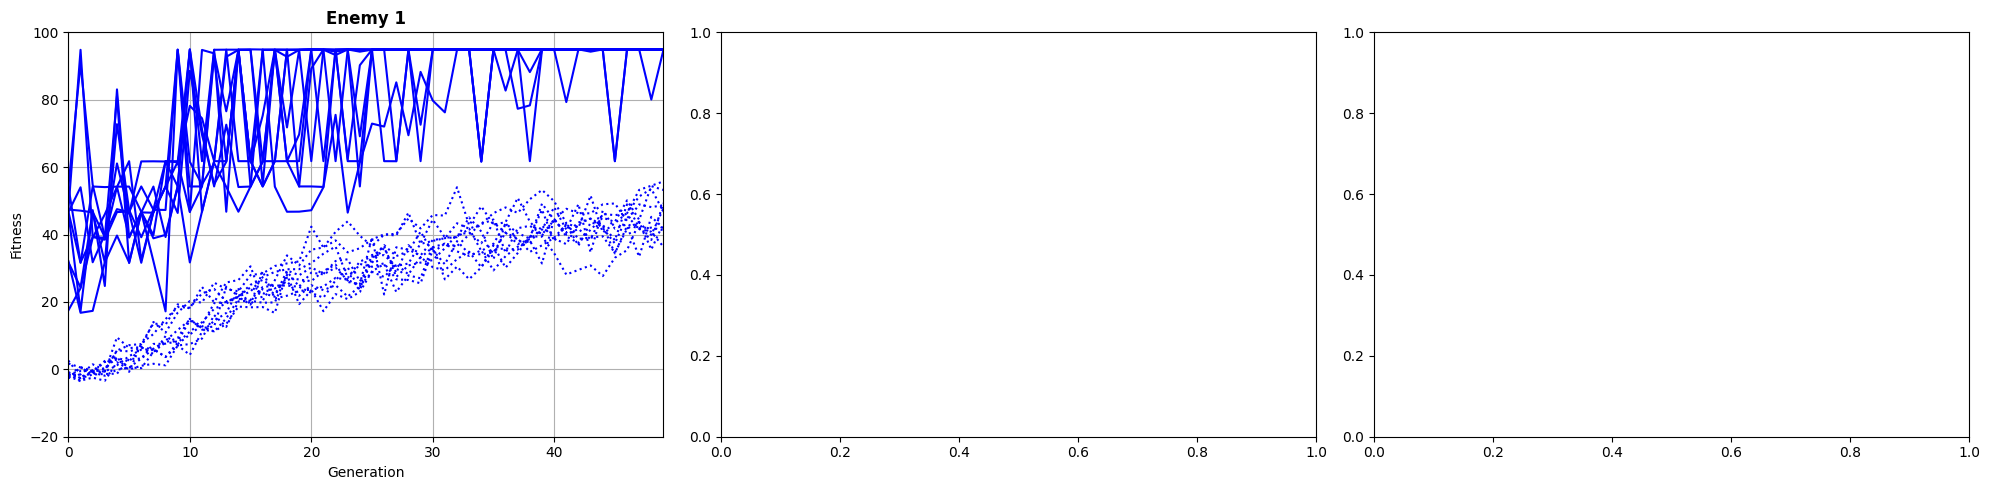

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
xx = np.arange(0, NGEN, 1, dtype=int)

# Plot setup
for (i, enemy) in enumerate(ENEMIES):
    # Y-axis
    axes[i].set_ylim(-20, 100)
    axes[i].set_yticks(np.arange(-20, 101, 20))
    axes[i].set_ylabel("Fitness")

    # X-axis
    axes[i].set_xlim(0, NGEN - 1)
    axes[i].set_xticks(np.arange(0, NGEN, 10))
    axes[i].set_xlabel("Generation")

    # Whole plot
    axes[i].set_title(f"Enemy {enemy}", weight="bold")
    axes[i].grid()

# Plotting data
for i in range(len(ENEMIES)):
    for j in range(N_RUNS):
        axes[i].plot(cmaes_max[i, j], color="blue", linestyle="solid")
        axes[i].plot(cmaes_mean[i, j], color="blue", linestyle="dotted")

fig.tight_layout()
plt.show()